In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Reading the data

In [2]:
B = pd.read_csv("C:/Users/akaks/Downloads/Cars93.csv")
B.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# replacing the missing values

In [3]:
from ML_Fun import replacer
replacer(B)

# Making Clusters using some features
    

In [4]:
# Here we will use Price, Horsepower, Length, Weight, AirBags, Type, Manufacturer, MPG.city

In [5]:
A = B[['Price','Horsepower','Length','Weight','AirBags','Type','Manufacturer','MPG.city']]

In [6]:
A

,Price,Horsepower,Length,Weight,AirBags,Type,Manufacturer,MPG.city
0,15.9,140,177,2705,None,Small,Acura,25
1,33.9,200,195,3560,Driver & Passenger,Midsize,Acura,18
2,29.1,172,180,3375,Driver only,Compact,Audi,20
3,37.7,172,193,3405,Driver only,Midsize,Audi,19
4,30.0,208,186,3640,Driver only,Midsize,BMW,22
...,...,...,...,...,...,...,...,...
88,19.7,109,187,3960,None,Van,Volkswagen,17
89,20.0,134,180,2985,None,Compact,Volkswagen,21
90,23.3,178,159,2810,None,Sporty,Volkswagen,18
91,22.7,114,190,2985,Driver only,Compact,Volvo,21


# Preparing the data

In [7]:
from ML_Fun import data_prep
X = data_prep(A)

In [8]:
X.head()

,Price,Horsepower,Length,Weight,MPG.city,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,Type_Compact,Type_Large,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,-0.375720,-0.073484,-0.427186,-0.627055,0.471312,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.497844,1.078322,0.812171,0.830208,-0.781032,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.998227,0.540813,-0.220626,0.514894,-0.423219,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.893374,0.540813,0.674465,0.566026,-0.602126,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.091905,1.231897,0.192493,0.966560,-0.065407,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Elbow Curve to decide the optimal number of clusters

In [9]:
K = []
WCSS = []
for i in range(1,20,1):
    km = KMeans(n_clusters=i)
    model = km.fit(X)
    K.append(i)
    WCSS.append(model.inertia_)

C:\Users\akaks\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x11ca05cf250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

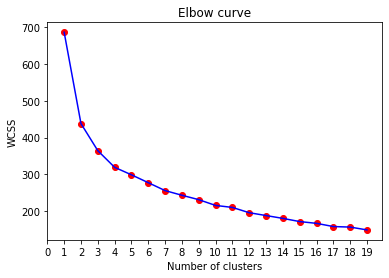

In [10]:
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.xticks(range(0,20,1))

In [11]:
# We will be using 4 clusters

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(X)
model.labels_

array([2, 1, 1, 1, 1, 2, 3, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3,
       0, 2, 2, 3, 2, 1, 0, 3, 0, 2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 3, 1, 2, 1, 2, 3, 0, 1, 0, 2, 3,
       3, 2, 2, 3, 3, 2, 0, 2, 3, 3, 3, 2, 0, 0, 0, 2, 0, 0, 2, 2, 3, 0,
       3, 2, 2, 2, 3])

In [13]:
model.inertia_

319.3650557358069

# Plotting the clusters

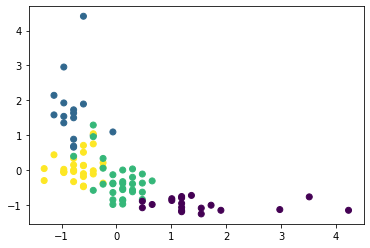

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X['MPG.city'],X.Price,c=model.labels_)

In [15]:
B['Cluster'] = model.labels_
B.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Cluster
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,2
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,1
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,1
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,...,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,1
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,1


# Get car recommendation

In [39]:
cm = input("Enter a car Make to see similar cars: ")

cluster_number_of_given_car = list(B[B.Make==cm].Cluster)[0]

W = list(B[B.Cluster == cluster_number_of_given_car].Make)
W.remove(cm)

print("Entered Car: ",cm)
print("Similar Cars: ",W)

Enter a car Make to see similar cars: Acura Integra
Entered Car:  Acura Integra
Similar Cars:  ['Buick Century', 'Chevrolet Cavalier', 'Chevrolet Corsica', 'Chrysler LeBaron', 'Dodge Shadow', 'Dodge Spirit', 'Dodge Dynasty', 'Ford Escort', 'Ford Tempo', 'Ford Mustang', 'Ford Probe', 'Honda Prelude', 'Honda Accord', 'Hyundai Elantra', 'Hyundai Sonata', 'Mazda 626', 'Mercedes-Benz 190E', 'Mercury Capri', 'Nissan Altima', 'Oldsmobile Achieva', 'Oldsmobile Cutlass_Ciera', 'Plymouth Laser', 'Pontiac Sunbird', 'Saab 900', 'Subaru Legacy', 'Toyota Celica', 'Toyota Camry', 'Volkswagen Passat', 'Volkswagen Corrado', 'Volvo 240']
